<a href="https://colab.research.google.com/github/yuki2023-kenkyu/Numerical_Computation_Seminar/blob/main/answers/%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95_1/answer%5B1%5D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 解析解の導出
___

ポイント：同次方程式 $f(x,y)=f(\frac{y}{x})$ の解法を用いる．

$$
\begin{eqnarray}
  \frac{dy}{dx} = \frac{x^2+y^2}{xy} = \frac{(x^2+y^2)\cdot\frac{1}{x^2}}{xy\cdot\frac{1}{x^2}} = \frac{1+({\frac{y}{x})}^2}{\frac{y}{x}}\\
\end{eqnarray}
$$


$\frac{y}{x}=u$とおくと，


$$
\begin{eqnarray}
  \frac{dy}{dx}=\frac{1+u^2}{u} \tag{ⅰ}\\
\end{eqnarray}
$$

また，$u$ は $x$ の関数で，$u=\frac{y}{x}\quad i.e.\quad y=xu$ より，この式の両辺を $x$ で微分して

$$
\begin{eqnarray}
  \frac{dy}{dx}&=&\frac{d}{dx}(xu)=\frac{d}{dx}x\cdot u+x\cdot \frac{d}{dx}u\\
&=&u+x\cdot\frac{du}{dx} \tag{ⅱ}
\end{eqnarray}
$$

(ⅰ)，(ⅱ)式より

$$u+x\cdot\frac{du}{dx}=\frac{1+u^2}{u}\quad i.e. \quad x\cdot \frac{du}{dx} = \frac{1}{u}$$

これより，変数分離して

$$
\begin{eqnarray}
  \int u \:du &=& \int \frac{1}{x} \;dx\\
  \frac{1}{2}\;u^2 &=& \log |x| +C
\end{eqnarray}
$$

$u=\frac{y}{x}$，$C=2\quad(\because x_0=1,y_0=2)$ を代入して

$$\therefore y = \sqrt{2x^2(\log |x|+2)}\quad(x \geq 1)$$

# 演習問題 [1] (3) の解答
___

<Figure size 432x288 with 0 Axes>

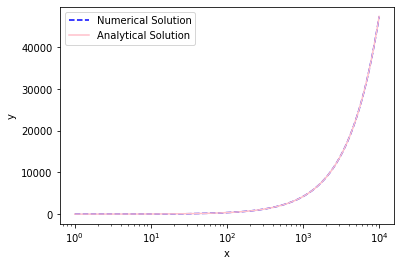

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# １階微分方程式
def f(x, y):
  return (x**2+y**2)/(x*y)
# 解析解
def g(x1, y1):
  A = 2
  return np.sqrt(2*x1**2*(np.log(np.abs(x1))+A))

# 初期条件
x0 = 1
y0 = 2
xmax = 10000

# 刻み幅の設定
m = 2**16
h = (xmax - x0) /m

# 変域の設定
xpoints = np.arange(x0, xmax, h)
x1points = np.arange(x0, xmax, h)
# 計算結果を保存する配列の用意
ypoints = []
y1points = []

# 初期値の代入
x=x1=x0
y=y1=y0
# 数値積分
for x in xpoints:
    # 配列に要素を追加
    ypoints.append(y)
    # ルンゲ・クッタ法のアルゴリズム
    k1 = h * f(x, y)
    k2 = h * f(x+h/2, y+k1/2)
    k3 = h * f(x+h/2, y+k2/2)
    k4 = h * f(x+h, y+k3)
    y += (k1+2*k2+2*k3+k4)/6

# 解析解
for x1 in x1points:
    y1points.append(y1)
    y1 = g(x1, y1)

# グラフ用の各種設定
fig = plt.figure()
# グラフの背景色の設定
fig, ax = plt.subplots(facecolor = 'white')

ax.plot(xpoints, ypoints, '--', label = 'Numerical Solution', color = 'Blue')
ax.plot(x1points, y1points, '-', label = 'Analytical Solution', color = 'Pink')
plt.xlabel('x')
plt.ylabel('y')
# 軸を対数軸に設定
ax.set_xscale("log")
#ax.set_yscale("log")
plt.legend(loc = 'best')